In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.optimizers import Adam

Using Theano backend.
Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


In [7]:
import os
import sys
base_module_path = os.path.abspath(os.path.join('..'))
if base_module_path not in sys.path:
    sys.path.append(base_module_path)
import ama as a

In [12]:
dir(a)

['__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '__path__',
 'preprocess',
 'trainbatch',
 'vgg']

In [18]:
Vgg = a.vgg.Vgg
preprocess = a.preprocess
TrainBatch = a.trainbatch.TrainBatch

In [20]:
path= '../data/'

In [21]:
vgg = Vgg(input_shape=(3,256,256))

In [23]:
traingen = TrainBatch(path+'train-jpg/', path+'train_v2.csv')
valgen = TrainBatch(path+'val-jpg/', path+'train_v2.csv')

Found 34479 images belonging to 1 classes.
Found 6000 images belonging to 1 classes.


In [24]:
img = traingen.next()[0][0]

In [31]:
img.shape

(3, 128, 128)

TypeError: Invalid dimensions for image data

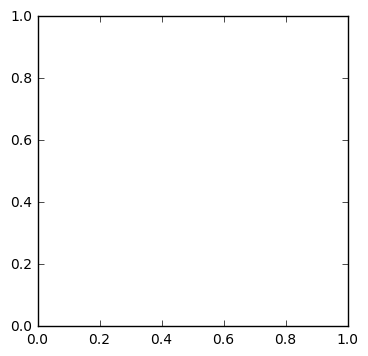

In [33]:
plt.imshow(img)

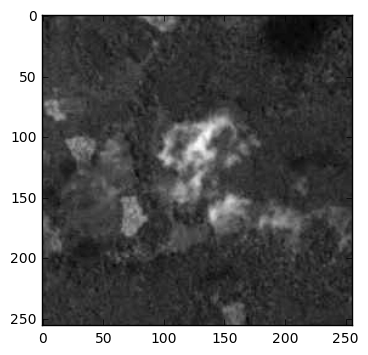

In [17]:
plt.imshow(img[2,:,:], cmap='gray')

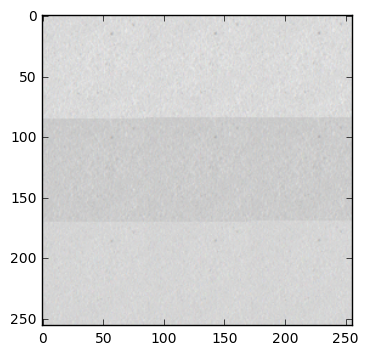

In [112]:
plt.imshow(img.reshape((256,256,3)), cmap='viridis')

In [19]:
vgg.model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy', metrics=['accuracy'])
vgg.model.fit_generator(traingen, samples_per_epoch=traingen.nb_sample, nb_epoch=1,
                        validation_data=valgen, nb_val_samples=valgen.nb_sample)

Epoch 1/1


Exception: Error when checking model input: expected batchnormalization_input_1 to have shape (None, 3, 32, 32) but got array with shape (128, 3, 256, 256)

In [11]:
vgg.model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy', metrics=['accuracy'])
vgg.model.fit_generator(traingen, samples_per_epoch=traingen.nb_sample, nb_epoch=1,
                        validation_data=valgen, nb_val_samples=valgen.nb_sample)

Epoch 1/1
34479/34479 [==============================] - 88s - loss: 0.2806 - acc: 0.9027 - val_loss: 0.2626 - val_acc: 0.9046


In [13]:
vgg.model.compile(optimizer=Adam(lr=0.01),loss='binary_crossentropy', metrics=['accuracy'])
vgg.model.fit_generator(traingen, samples_per_epoch=traingen.nb_sample, nb_epoch=5,
                        validation_data=valgen, nb_val_samples=valgen.nb_sample)

Epoch 1/5
34479/34479 [==============================] - 87s - loss: 0.3355 - acc: 0.8874 - val_loss: 0.3369 - val_acc: 0.8834
Epoch 2/5
34479/34479 [==============================] - 87s - loss: 0.2801 - acc: 0.8995 - val_loss: 5.3270 - val_acc: 0.6668
Epoch 3/5
34479/34479 [==============================] - 85s - loss: 0.2724 - acc: 0.9019 - val_loss: 0.2705 - val_acc: 0.9044
Epoch 4/5
34479/34479 [==============================] - 83s - loss: 0.2612 - acc: 0.9048 - val_loss: 0.2734 - val_acc: 0.9048
Epoch 5/5
34479/34479 [==============================] - 84s - loss: 0.2601 - acc: 0.9050 - val_loss: 0.2600 - val_acc: 0.9050


In [302]:
vgg.model.compile(optimizer=Adam(lr=0.0001),loss='binary_crossentropy', metrics=['accuracy'])
vgg.model.fit_generator(traingen, samples_per_epoch=traingen.nb_sample, nb_epoch=5,
                        validation_data=valgen, nb_val_samples=valgen.nb_sample)

Epoch 1/5
34479/34479 [==============================] - 86s - loss: 0.2563 - acc: 0.9052 - val_loss: 0.2560 - val_acc: 0.9050
Epoch 2/5
34479/34479 [==============================] - 82s - loss: 0.2563 - acc: 0.9052 - val_loss: 0.2560 - val_acc: 0.9050
Epoch 3/5
34479/34479 [==============================] - 82s - loss: 0.2563 - acc: 0.9052 - val_loss: 0.2560 - val_acc: 0.9050
Epoch 4/5
34479/34479 [==============================] - 83s - loss: 0.2563 - acc: 0.9052 - val_loss: 0.2560 - val_acc: 0.9050
Epoch 5/5
34479/34479 [==============================] - 84s - loss: 0.2562 - acc: 0.9052 - val_loss: 0.2560 - val_acc: 0.9050


In [14]:
preds = vgg.model.predict_generator(traingen, traingen.nb_sample)

In [15]:
labels = [
    "agriculture",
    "artisinal_mine",
    "bare_ground",
    "blooming",
    "blow_down",
    "clear",
    "cloudy",
    "conventional_mine",
    "cultivation",
    "habitation",
    "haze",
    "partly_cloudy",
    "primary",
    "road",
    "selective_logging",
    "slash_burn",
    "water"
]


In [17]:
preds

array([[ 0.39392167,  0.00665431,  0.01373488, ...,  0.00818024,
         0.00681127,  0.1900686 ],
       [ 0.3998788 ,  0.00669619,  0.01317724, ...,  0.00825059,
         0.00690244,  0.19031408],
       [ 0.35659808,  0.0067635 ,  0.02045142, ...,  0.0072494 ,
         0.0051285 ,  0.19362558],
       ..., 
       [ 0.32104561,  0.00665624,  0.0287642 , ...,  0.00605198,
         0.00375624,  0.18963976],
       [ 0.38930643,  0.00674073,  0.01425822, ...,  0.00791009,
         0.00649171,  0.19054222],
       [ 0.3514398 ,  0.00670204,  0.0212583 , ...,  0.00698098,
         0.00487126,  0.19176392]], dtype=float32)

0.00086251734

In [314]:
labels[0]

array([ 0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.])